## Support Vector Regression

---

In [1]:
# Import libraries

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import dataset

os.chdir('//Users/mareksturek/Documents/GitHub/machine-learning/data')
dataset = pd.read_csv('rawpositionsalary.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [3]:
# Showcase data

dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
# Create X, y 

X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [5]:
# Feature scaling

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [6]:
# Fitting SVR to the dataset

import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR()

In [7]:
# Predicting a new result

y_pred = regressor.predict([[6.5]])
y_pred = sc_y.inverse_transform(y_pred)

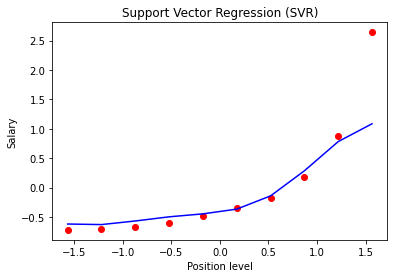

In [8]:
# Visualising the SVR results

plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Support Vector Regression (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

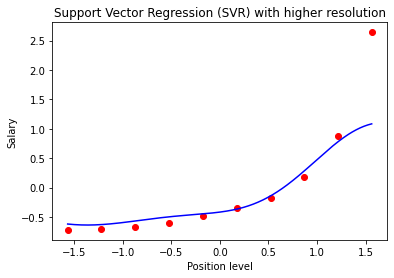

In [9]:
# Visualising the SVR results (for higher resolution and smoother curve)

X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Support Vector Regression (SVR)​ with higher resolution')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [10]:
print(y_pred)

[252789.13921624]
